# Decision Tree Regression

The folowing dataset is in one dimension and you will see lately that decision trees are not good for one dimension and are very robust with multiple dimensions in it.

In [3]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [4]:
head(dataset)

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000


NO need for feature scaling as library(rpart) will take care of it

In [9]:
# Fitting Decision Tree Regression to the dataset
library(rpart)
regressor = rpart(formula = Salary ~ .,
                  data = dataset)

In [10]:
# Predicting a new result with Decision Tree Regression
y_pred = predict(regressor, data.frame(Level = 6.5))

In [11]:
y_pred

[1] 249500

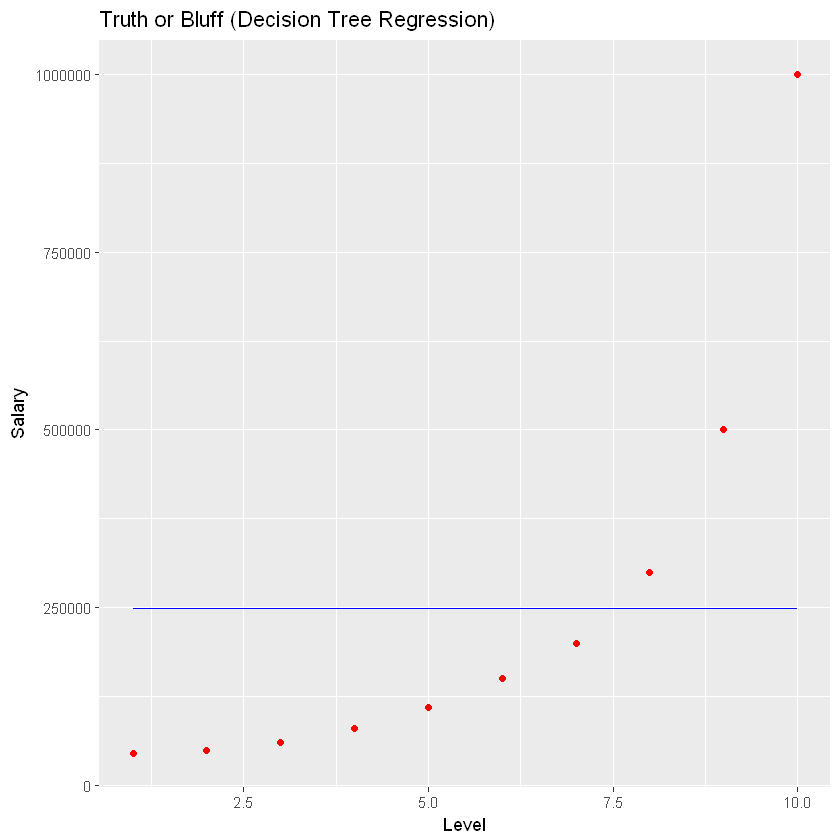

In [14]:
# Visualising the Decision Tree Regression results (higher resolution)
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

##### The problem is no. of split is only one with an average of of all ten levels

In [16]:
# Fitting Decision Tree Regression to the dataset
library(rpart)
regressor = rpart(formula = Salary ~ .,
                  data = dataset,
                  control = rpart.control(minsplit = 1))

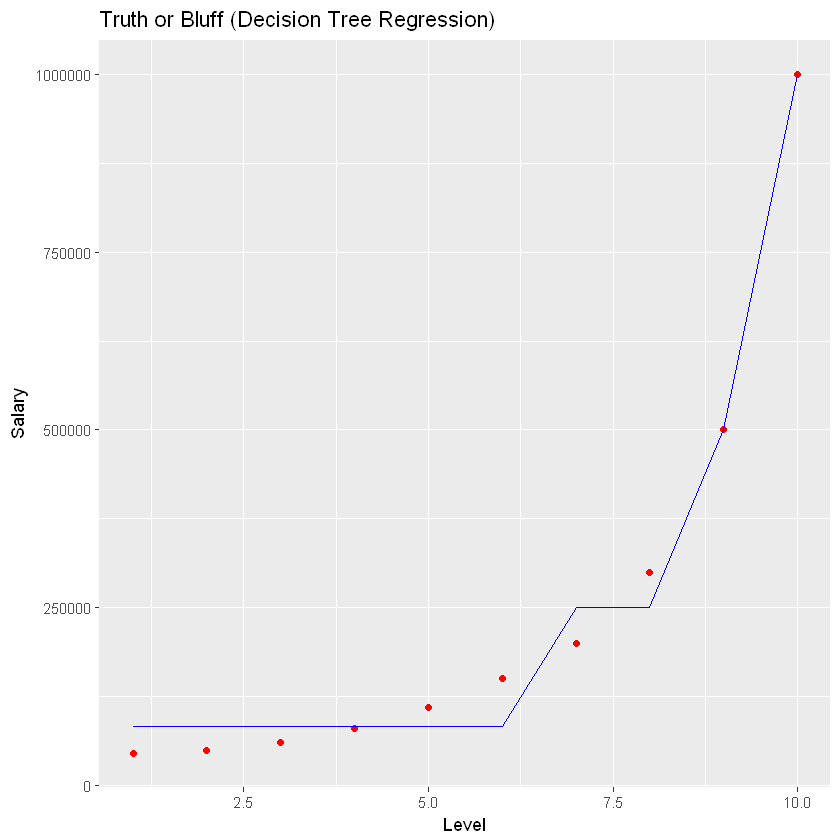

In [17]:
# Visualising the Decision Tree Regression results (higher resolution)
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

Above model is improved one but with few key issues to re-model( 4 intervals making splits)

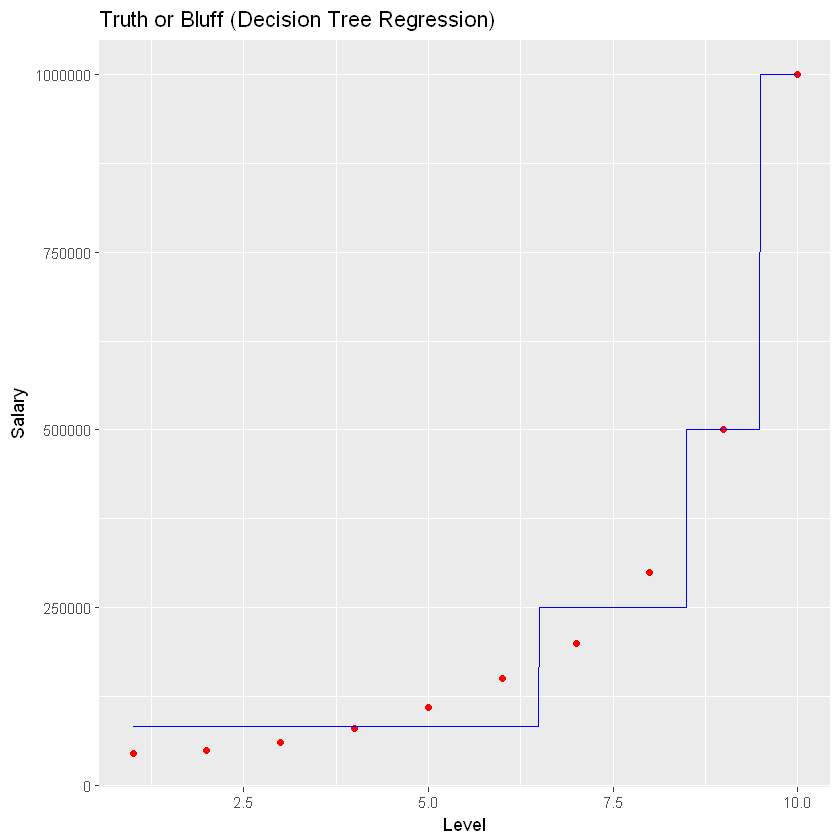

In [18]:
# Visualising the Decision Tree Regression results (higher resolution)
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

In [20]:
# Predicting a new result with Decision Tree Regression
y_pred = predict(regressor, data.frame(Level = 6.5))

In [21]:
y_pred

1 
250000

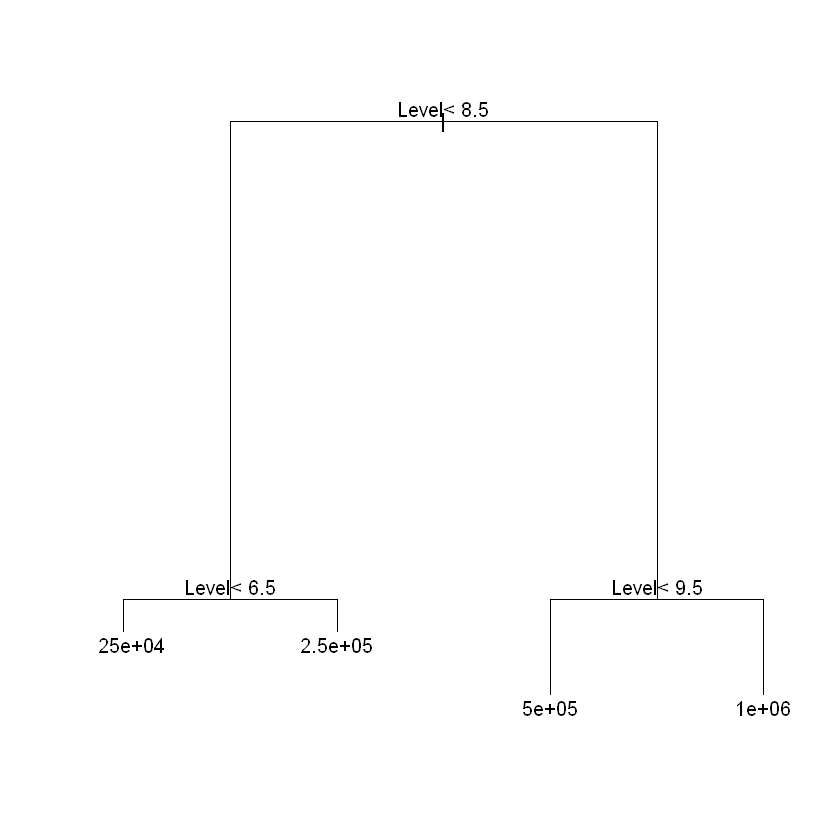

In [19]:
# Plotting the tree
plot(regressor)
text(regressor)